## Chapter 4: Classification ##

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.lda import LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

//anaconda/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [2]:
smarket_df = pd.read_csv("../data/Smarket.csv")
smarket_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


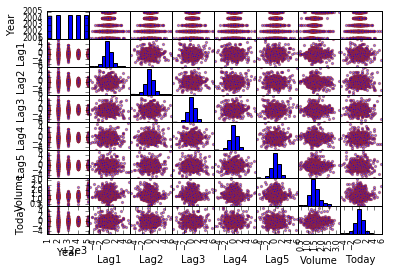

In [3]:
# equivalent to the R pairs(df) command.
axes = pd.tools.plotting.scatter_matrix(smarket_df, color="brown")

### Logistic Regression ###

According to [this blog post](https://github.com/ariddell/tatom/blob/master/source/classification_logistic_regression.rst), Scikit-Learn's LogisticRegression has some significant differences from R's glm - to reproduce R's glm, one should use statsmodels.api.GLM. But my preference is to work with Scikit-Learn because of its greater breadth, so unless there is something that is only available from statsmodels, I am going to use Scikit-Learn. The numbers below are not identical but close.

In [4]:
X = smarket_df[smarket_df.columns[1:-2]]
y = pd.factorize(smarket_df["Direction"])[0]
clf = LogisticRegression()
clf.fit(X, y)
(clf.intercept_, clf.coef_)

(array([ 0.11454962]),
 array([[ 0.07279035,  0.04229102, -0.010958  , -0.00921799, -0.01023031,
         -0.12793931]]))

In [5]:
# return probability for each class. R's predict() only returns the probability of the first 
# class, so we do the same.
probs = clf.predict_proba(X)
[prob[0] for prob in probs[0:5]]

[0.50775595757199166,
 0.48208765404825193,
 0.48147907945142998,
 0.51561031224141374,
 0.51134987027174317]

In [6]:
ypreds = ["Up" if prob[0] > 0.5 else "Down" for prob in probs]
ypreds[0:5]

['Up', 'Down', 'Down', 'Up', 'Up']

In [7]:
# R uses table() to tabulate the confusion matrix below
yacts = [str(x) for x in smarket_df["Direction"].values]
confusion_matrix(yacts, ypreds)

array([[143, 459],
       [135, 513]])

In [8]:
accuracy_score(yacts, ypreds)

0.52480000000000004

### Make Training and Test Set ###

In [9]:
# Split dataset into training and test sets
smarket_train_df = smarket_df[smarket_df["Year"] < 2005]
smarket_test_df = smarket_df[smarket_df["Year"] >= 2005]
# train Logistic Regression model with training data
clf2 = LogisticRegression()
Xtrain = smarket_train_df[smarket_df.columns[1:-2]]
ytrain = pd.factorize(smarket_train_df["Direction"])[0]
clf2.fit(Xtrain, ytrain)
# test model with test data
Xtest = smarket_test_df[smarket_df.columns[1:-2]]
ytest = pd.factorize(smarket_test_df["Direction"])[0]
ypred = clf2.predict(Xtest)
# calculate confusion matrix and accuracy
confusion_matrix(ytest, ypred)

array([[40, 71],
       [52, 89]])

In [10]:
accuracy_score(ytest, ypred)

0.51190476190476186

### Fit smaller model ###

In [11]:
clf3 = LogisticRegression()
Xtrain = smarket_train_df[smarket_df.columns[1:3]]
Xtest = smarket_test_df[smarket_df.columns[1:3]]
clf3.fit(Xtrain, ytrain)
ypred = clf3.predict(Xtest)
confusion_matrix(ytest, ypred)

array([[ 76,  35],
       [106,  35]])

In [12]:
accuracy_score(ytest, ypred)

0.44047619047619047

### Linear Discriminant Analysis ###

In [13]:
clf4 = LDA()
clf4.fit(Xtrain, ytrain)
ypred = clf4.predict(Xtest)
ypred[0:5]

array([0, 0, 0, 0, 0])

In [14]:
confusion_matrix(ytest, ypred)

array([[ 76,  35],
       [106,  35]])

In [15]:
accuracy_score(ytest, ypred)

0.44047619047619047

### K-Nearest Neighbors ###

In [16]:
clf5 = KNeighborsClassifier()
clf5.fit(Xtrain, ytrain)
ypred = clf5.predict(Xtest)
confusion_matrix(ytest, ypred)

array([[71, 40],
       [82, 59]])

In [17]:
accuracy_score(ytest, ypred)

0.51587301587301593